In [7]:
%%capture
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import string
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from google.colab import files

## Dataset

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
df.shape

(24783, 2)

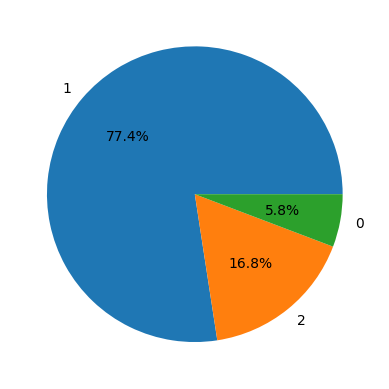

In [3]:
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()

## Balancing the Dataset

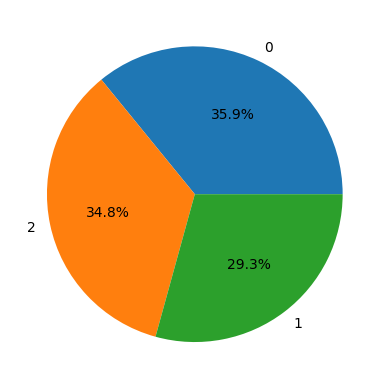

In [4]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)

plt.pie(balanced_df['class'].value_counts().values,
		labels=balanced_df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()

## Data Cleaning

In [5]:
# remove twitter terms and urls
def remove_twitter_terms(text):
	for word in text.split():
    # remove URLs
		if '@' in word:
			text = text.replace(word, '')
  # remove "RT"
	text = text.replace('rt', '')
  # remove URLs
	text = re.sub(r'http\S+', '', text)
	return text

# remove punctuations
def remove_punctuations(tweet):
	temp = str.maketrans('', '', string.punctuation)
	return tweet.translate(temp)

# remove stopwords
def remove_stopwords(tweet):
	stop_words = stopwords.words('english')
	imp_words = []
	# storing the important words
	for word in str(tweet).split():
		if word not in stop_words:
			# lemmatize the word as well before appending to the imp_words list.
			lemmatizer = WordNetLemmatizer()
			lemmatizer.lemmatize(word)
			imp_words.append(word)
	output = " ".join(imp_words)
	return output

In [8]:
# lower case all the words of the tweet before any preprocessing
balanced_df['tweet'] = balanced_df['tweet'].str.lower()

balanced_df['tweet'] = balanced_df['tweet'].apply(lambda x: remove_twitter_terms(x))
balanced_df['tweet']= balanced_df['tweet'].apply(lambda x: remove_punctuations(x))
balanced_df['tweet'] = balanced_df['tweet'].apply(lambda x: remove_stopwords(x))

balanced_df.head()

,class,tweet
85,0,queer gaywad
89,0,alsarabsss hes beaner smh tell hes mexican
110,0,youre fucking gay blacklisted hoe holding tehg...
184,0,lmfaoooo hate black people theres black people...
202,0,least im nigger lmfao


In [13]:
balanced_df.shape

(11953, 2)

## Save Dataset

In [15]:
balanced_df.to_csv('balanced_dataset.csv', index=False)
files.download('balanced_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>